# Data Analysis Project 
---

**Project Title:** Numerical Integration of Mixing Efficiency of a Hypersonic Flow Using Python

---

## Project Description
Supersonic Combustion Ramjet (Scramjet) has recently drawn the attention of scientists and researchers due to its absence of moving parts and high speed (**Mach 5 or above**). For achieving such speed, proper combustion is prerequisite and proper combustion takes place when fuel mixes well with air (oxidizer) inside Scramjet's combustion chamber within very short time. Both numerical and experimental approaches have been taken over the years to improve mixing of air-fuel. This project deals with such numerical simulation data ( simulation of the Scramjet combustor's flow field was performed on ***ANSYS Fluent 22.0*** ).

#### Project Goal:
The aim of this protect is to find out ```a pattern or a specific area to focus``` within Scramjet's ignition chamber from the simulation data to improve air-fuel mixing.

#### Project Outlines:
- To take input of the simulation data. 
- To manipulate the input data.
- To perform numerical integration using integral equations introduced by MarIon Mao and David W. Riggins. [Source](https://ntrs.nasa.gov/citations/19910011784).
- To show the output result of the numerical integration.
- To visualize it to get a clear insight about how well the fuel is mixing with the incoming air across the whole combustion chamber.
- To recommend which area or areas to focus in the ignition chamber for better mixing.

## Problem Solution Approach
In this project, we will use six phases of Data Analytics process, such as, **Ask, Prepare, Process, Analyze, Share** and **Act** to achieve the project goal. 

### 1. Ask ( Problem Definition):
The problem in this project is to ```discover a pattern from the output result and to define one or more specifice cross-sectional locations or zones``` in the ignition chamber so that focusing on these locations or zones, researchers who were performing simulations may dive in to investigate, find causes and take actions to ameliorate mixing.

### 2. Prepare ( Collection of Data ):
In this phase of data analysis, analysts collect relevent data. Luckily for us, we already have the simulation dataset.

### 3. Process ( Cleaning, Removing Inaccuacies or Duplicates, Formatting,  or Manipulating Data ):
In the third phase of data analysis, we will prepare the simulation data for numerical integration model. We will clean the data by removing null values or duplicate values. Then we will sort the data and format the dataset properly so that it is ready to be fed into the model. Let's take a step-by-step approach.
Firstly, let us import the python libraries and create a DataFrame from simulation dataset.

In [1]:
# Importing all python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Reading csv file and creating DataFrame

initial_data = pd.read_csv("E:/All/Codes/PR120.csv")
initial_data


,x_coordinate,y_coordinate,density,x_velocity,f_h2,Static_Pressure,Mach_Number,f_air
0,0.121259,0.002284,0.297909,2688.629640,0.000115,88060.6953,4.287759,0.999885
1,0.120993,0.002284,0.299933,2687.856450,0.000115,88824.7109,4.282809,0.999885
2,0.121259,0.002160,0.297353,2687.101560,0.000110,88129.9062,4.279319,0.999890
3,0.120993,0.002160,0.299370,2686.313960,0.000110,88896.0156,4.274288,0.999890
4,0.121259,0.002405,0.298466,2690.105220,0.000119,87990.9922,4.296156,0.999881
...,...,...,...,...,...,...,...,...
120444,0.040546,0.016767,0.061561,-8.001616,0.631510,243953.7810,0.039458,0.368490
120445,0.130892,0.008416,0.580264,2518.438230,0.004516,251111.3280,3.349754,0.995484
120446,0.040546,0.016649,0.061090,54.756451,0.641294,243947.0160,0.044106,0.358706
120447,0.130892,0.008474,0.578323,2515.188720,0.004765,252273.8280,3.332471,0.995235


#### Clearning:
Now, let's remove any ```null data``` from the DataFrame.

In [3]:
# Checking and removing null values

null_chceked_data = initial_data.dropna()
null_chceked_data


,x_coordinate,y_coordinate,density,x_velocity,f_h2,Static_Pressure,Mach_Number,f_air
0,0.121259,0.002284,0.297909,2688.629640,0.000115,88060.6953,4.287759,0.999885
1,0.120993,0.002284,0.299933,2687.856450,0.000115,88824.7109,4.282809,0.999885
2,0.121259,0.002160,0.297353,2687.101560,0.000110,88129.9062,4.279319,0.999890
3,0.120993,0.002160,0.299370,2686.313960,0.000110,88896.0156,4.274288,0.999890
4,0.121259,0.002405,0.298466,2690.105220,0.000119,87990.9922,4.296156,0.999881
...,...,...,...,...,...,...,...,...
120444,0.040546,0.016767,0.061561,-8.001616,0.631510,243953.7810,0.039458,0.368490
120445,0.130892,0.008416,0.580264,2518.438230,0.004516,251111.3280,3.349754,0.995484
120446,0.040546,0.016649,0.061090,54.756451,0.641294,243947.0160,0.044106,0.358706
120447,0.130892,0.008474,0.578323,2515.188720,0.004765,252273.8280,3.332471,0.995235


Since the number of rows in the DataFrame before dropping null values and after dropping the null values were exactly the same ( 120449 rows ), hence, there were no null values in the dataset. Let us check for ```duplicates``` now.

In [4]:
# Checking for duplicate values

check_for_duplicate_data = null_chceked_data.copy()
check_for_duplicate_data['Check_duplicate'] = check_for_duplicate_data.duplicated()
check_for_duplicate_data


,x_coordinate,y_coordinate,density,x_velocity,f_h2,Static_Pressure,Mach_Number,f_air,Check_duplicate
0,0.121259,0.002284,0.297909,2688.629640,0.000115,88060.6953,4.287759,0.999885,False
1,0.120993,0.002284,0.299933,2687.856450,0.000115,88824.7109,4.282809,0.999885,False
2,0.121259,0.002160,0.297353,2687.101560,0.000110,88129.9062,4.279319,0.999890,False
3,0.120993,0.002160,0.299370,2686.313960,0.000110,88896.0156,4.274288,0.999890,False
4,0.121259,0.002405,0.298466,2690.105220,0.000119,87990.9922,4.296156,0.999881,False
...,...,...,...,...,...,...,...,...,...
120444,0.040546,0.016767,0.061561,-8.001616,0.631510,243953.7810,0.039458,0.368490,False
120445,0.130892,0.008416,0.580264,2518.438230,0.004516,251111.3280,3.349754,0.995484,False
120446,0.040546,0.016649,0.061090,54.756451,0.641294,243947.0160,0.044106,0.358706,False
120447,0.130892,0.008474,0.578323,2515.188720,0.004765,252273.8280,3.332471,0.995235,False


In [5]:
# Showing the duplicate values

check_for_duplicate_data[check_for_duplicate_data['Check_duplicate']==True]


,x_coordinate,y_coordinate,density,x_velocity,f_h2,Static_Pressure,Mach_Number,f_air,Check_duplicate


So, it appears from the output that there are no duplicate values in the current simulation dataset. However, we will write the code which would remove duplicates from the dataset so that even if there are duplicates in different datasets, we can remove those duplicates.

In [6]:
# Removing the duplicate values

duplicate_removed_data = null_chceked_data.drop_duplicates()
duplicate_removed_data


,x_coordinate,y_coordinate,density,x_velocity,f_h2,Static_Pressure,Mach_Number,f_air
0,0.121259,0.002284,0.297909,2688.629640,0.000115,88060.6953,4.287759,0.999885
1,0.120993,0.002284,0.299933,2687.856450,0.000115,88824.7109,4.282809,0.999885
2,0.121259,0.002160,0.297353,2687.101560,0.000110,88129.9062,4.279319,0.999890
3,0.120993,0.002160,0.299370,2686.313960,0.000110,88896.0156,4.274288,0.999890
4,0.121259,0.002405,0.298466,2690.105220,0.000119,87990.9922,4.296156,0.999881
...,...,...,...,...,...,...,...,...
120444,0.040546,0.016767,0.061561,-8.001616,0.631510,243953.7810,0.039458,0.368490
120445,0.130892,0.008416,0.580264,2518.438230,0.004516,251111.3280,3.349754,0.995484
120446,0.040546,0.016649,0.061090,54.756451,0.641294,243947.0160,0.044106,0.358706
120447,0.130892,0.008474,0.578323,2515.188720,0.004765,252273.8280,3.332471,0.995235


#### Sorting and Formatting:
Now, since we have removed both duplicates and null values, let us sort the data first by column ```x_coordinate``` and then by ```y_coordinate```. After that,let us reset the indexes which will make our dataset ready for analyze phase.

In [7]:
# Sorting data in DataFrame

data = duplicate_removed_data.sort_values(by=["x_coordinate","y_coordinate"])
data


,x_coordinate,y_coordinate,density,x_velocity,f_h2,Static_Pressure,Mach_Number,f_air
35663,0.0,0.000184,0.000695,0.000000,5.900000e-22,625.501404,0.010712,1.0
34974,0.0,0.000363,0.000686,0.000000,5.900000e-22,616.834473,0.016225,1.0
34283,0.0,0.000537,0.000673,0.000000,5.900000e-22,605.561768,0.021991,1.0
33590,0.0,0.000707,0.000659,0.000000,5.910000e-22,592.261292,0.026975,1.0
32896,0.0,0.000871,0.000643,0.000000,5.920000e-22,577.486450,0.031048,1.0
...,...,...,...,...,...,...,...,...
14964,0.2,0.019723,0.153353,1204.733400,0.000000e+00,222983.547000,0.879590,1.0
16553,0.2,0.019784,0.149142,1048.098750,0.000000e+00,222658.812000,0.755955,1.0
18055,0.2,0.019842,0.144697,905.724548,0.000000e+00,222446.359000,0.644490,1.0
19585,0.2,0.019897,0.138128,802.791992,0.000000e+00,187364.531000,0.559121,1.0


In [8]:
# Reseting the indexes

data = data.reset_index(drop=True)
data


,x_coordinate,y_coordinate,density,x_velocity,f_h2,Static_Pressure,Mach_Number,f_air
0,0.0,0.000184,0.000695,0.000000,5.900000e-22,625.501404,0.010712,1.0
1,0.0,0.000363,0.000686,0.000000,5.900000e-22,616.834473,0.016225,1.0
2,0.0,0.000537,0.000673,0.000000,5.900000e-22,605.561768,0.021991,1.0
3,0.0,0.000707,0.000659,0.000000,5.910000e-22,592.261292,0.026975,1.0
4,0.0,0.000871,0.000643,0.000000,5.920000e-22,577.486450,0.031048,1.0
...,...,...,...,...,...,...,...,...
120444,0.2,0.019723,0.153353,1204.733400,0.000000e+00,222983.547000,0.879590,1.0
120445,0.2,0.019784,0.149142,1048.098750,0.000000e+00,222658.812000,0.755955,1.0
120446,0.2,0.019842,0.144697,905.724548,0.000000e+00,222446.359000,0.644490,1.0
120447,0.2,0.019897,0.138128,802.791992,0.000000e+00,187364.531000,0.559121,1.0


### 4. Analyze ( Building Model, Testing and Analyzing, or Using Previous Model and Analyzing ):
In the fourth phase of data analysis, analyzing the data collected involves using tools to transform and organize the information so that we can draw conclusions. It involves using an analytic approach to build models and using this model to test and evaluate the data to find out the results.

#### Modelling:
We will use integral equations introduced by **MarIon Mao and David W. Riggins** to calculate mixing efficiency in a hypersonic flow field which can be expressed as,

$$ \eta_{m} =\frac{\int Y\rho u dA}{\dot{m_f}}$$
where,

$\eta_{m} $ = mixing efficiency of the fuel in the flow field

$\rho $ = local density of the fuel

$ u $ = local x-velocity of the flow field

$ dA $ = local cross-sectional area perpendicular to the flow field

$\dot{m_f}$ = global (total) mass flow rate of the fuel

$ Y $ is a mass-fraction term (of fuel) which can be calculated as follows:

$$ 
Y = \begin{cases}
             {Y_{f}} \quad  \quad \quad \quad \quad \quad \text{when} \quad {Y_{f}}\leqslant{Y_{f,st}}  \\\\ 
             (\frac{Y_{f,st}}{1-Y_{f,st}}) (1-Y_{f}) \quad\quad \text{when} \quad {Y_{f}}\gt{Y_{f,st}}
       \end{cases}
$$

$Y_{f}$ = local mass-fraction of the fuel 

$Y_{f,st}$ = stoichiometric mass fraction of the fuel

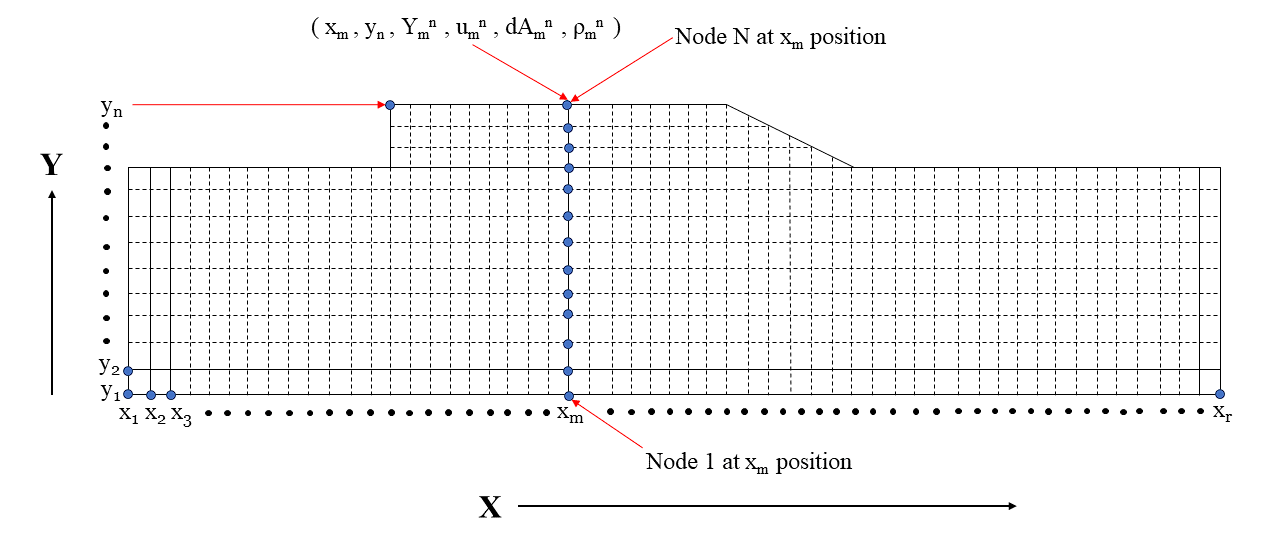

During the simulation, the maximum width and the height of the ignitor have been divided into (r-1) and (n-1) segments respectively. Vertical and horizontal lines have been drawn from the corner points of each segment and intersections of these lines are the nodal points. Data have been collected from each nodal point and we are using those data. We have denoted the points on the width ( x-axis ) as $x_{1}$, $x_{2}$, $x_{3}$ $........$ $x_{r}$ respectively and the points on the height ( y-axis ) to be $y_{1}$, $y_{2}$, $y_{3}$ $........$ $y_{n}$ respectively. 

For ```each particular x-position```, the numerical integration is performed by ```summing up the product``` of local fuel mass-fraction, local density of the fuel, local x-velocity of the flow field and local cross-sectional area perpendicular to the flow field. For instance, for horizontal position $x_{m}$, there are **N** number of nodes ( for each N number of y positions ) which have been shown by the ```blue``` dots. Node 1 is located at position ($x_{m}$ , $y_{1}$), Node 2 is located at position ($x_{m}$ , $y_{2}$) and similarly, Node N is located at position ($x_{m}$ , $y_{n}$). Now, the local fuel-mass fraction, local density, local velocity and local cross-sectional area at Node 1 can be expressed as, $Y_{m}^{1}$ , $\rho_{m}^{1}$ , $u_{m}^{1}$ and $dA_{m}^{1}$ respectively. 

Hence, local mass flow rate of the fuel at Node 1 can be expressed as, ${Y_{m}^{1} \rho_{m}^{1} u_{m}^{1} dA_{m}^{1}}$.
Similarly, local mass flow rate at Node 2 , $......$ , and Node N can be expressed as, $ {Y_{m}^{2} \rho_{m}^{2} u_{m}^{2} dA_{m}^{2}}$ , $......$ , and ${ Y_{m}^{n} \rho_{m}^{n} u_{m}^{n} dA_{m}^{n}}$ respectively. Therefore, for x-position $x_{m}$ , ```mixing efficiency``` can be calculated as,

$$ \Bigg[\eta_{m}\Bigg]_{x_{m}} = \frac{\text{Sum of Individual (Each Node) Mass Flow Rates of Fuel}}{\text{Gobal Mass Flow Rate of Fuel}} = \frac {\sum \limits_{i=1}^{n}Y_{m}^{i} \rho_{m}^{i} u_{m}^{i} dA_{m}^{i}} {\dot{m_f}}$$

Now, we will write the code to generate a function which can calculate the mixing efficiency at each x-location by using the above equation. But before that, we will calculate the global mass-flow rate of fuel, $\dot{m_f}$ and find out the unique x-coordinates from the DataFrame.

**Global mass flow rate of fuel, $\dot{m_f}$ :**

In [9]:
# Calculating the mass of injected fuel

PR = 12  # Jet_to_crossflow pressure ratio

fuel_mass = PR*0.101*0.546
print("Global Mass Flow Rate of Injected Fuel: {}".format(fuel_mass))


Global Mass Flow Rate of Injected Fuel: 0.6617520000000001


**Unique X-Coordinates:**

In [10]:
# Calculating number of unique x_data along the streamwise direction(x_direction)

row_num = data.shape[0]   # Returns the number of rows
print("Row Number: {}".format(row_num))

x_dataset = pd.DataFrame(columns=['unique_x_coordinate'])
i=0

for n in range(row_num):
    if n < (row_num-1):
         if data['x_coordinate'].values[n] != data['x_coordinate'].values[n+1]:
                x_dataset.loc[i,"unique_x_coordinate"] = data['x_coordinate'].values[n]
                i=i+1
    elif n==(row_num-1):
        x_dataset.loc[i,"unique_x_coordinate"] = data['x_coordinate'].values[row_num-1]

x_dataset


Row Number: 120449


,unique_x_coordinate
0,0.0
1,0.000107
2,0.000218
3,0.000332
4,0.000449
...,...
546,0.195988
547,0.196977
548,0.197975
549,0.198983


We will now generate a ```Class``` to determine mixing efficiency at each node by summing up the individual mass flow rate and dividing the result by golbal mass flow rate.

In [11]:
# Class for performing numerical integration at individual streamwise(x) location.

class Mixing_Efficiency_Scramjet():
    def __init__(self,data,x_dataset,fuel_mass):
        self.x_dataset = x_dataset
        self.data = data
        self.fuel_mass = fuel_mass
        self.row_unique = x_dataset.shape[0]
        self.Result_dataset = pd.DataFrame(columns=['x_coordinate','Mixing_efficiency(%)'])
        
    # cal_dataset refers to calculation dataset    
    def efficiency_calculator(self):
        print("Performing Calculations... Please Wait ...")
        for ii in range(self.row_unique):
            self.cal_dataset = self.data[self.x_dataset.loc[ii,"unique_x_coordinate"]==self.data.loc[:,"x_coordinate"]]
            self.cal_dataset = self.cal_dataset.reset_index(drop=True)
            self.cal_dataset_row = self.cal_dataset.shape[0]
    
            # Stoichiometric air fuel ratio and corrected hydrogen mass fraction
            self.cal_dataset['st_air_fuel_ratio'] = self.cal_dataset.loc[:,"f_air"]*0.0285
    
            for k in range(self.cal_dataset_row):
                if self.cal_dataset.loc[k,'f_h2'] <= self.cal_dataset.loc[k,'st_air_fuel_ratio']:
                    self.cal_dataset.loc[k,'st_f_h2'] = self.cal_dataset.loc[k,'f_h2']
                else:
                    self.cal_dataset.loc[k,'st_f_h2'] = self.cal_dataset.loc[k,'f_air']*0.0293
                    
            #Finding Area
            for kk in range(self.cal_dataset_row):
                if kk>0 :
                    self.cal_dataset.loc[kk,'y_difference'] = (self.cal_dataset.loc[kk,'y_coordinate']
                                                               -self.cal_dataset.loc[kk-1,'y_coordinate'])
                elif kk==0:
                    self.cal_dataset.loc[kk,'y_difference'] = self.cal_dataset.loc[kk,'y_coordinate']
            
            for m in range(self.cal_dataset_row):
                if m==0 :
                    self.cal_dataset.loc[m,'dA'] = self.cal_dataset.loc[m,'y_difference']/2
                elif m < (self.cal_dataset_row - 1):
                    self.cal_dataset.loc[m,"dA"] = (self.cal_dataset.loc[m,'y_difference']
                                                    +self.cal_dataset.loc[m+1,'y_difference'])/2
                elif m == (self.cal_dataset_row-1) :
                    self.cal_dataset.loc[m,'dA'] = self.cal_dataset.loc[m,'y_difference']/2
            
            # Integral Individual Result Data (mixing-efficiency corresponding to each x_coordinate)
            for p in range(self.cal_dataset_row):
                self.cal_dataset.loc[p,'fuel_mixing_data'] = (self.cal_dataset.loc[p,'density']*
                        self.cal_dataset.loc[p,'x_velocity']*self.cal_dataset.loc[p,'st_f_h2']*self.cal_dataset.loc[p,'dA'])
    
            self.Mixing_efficiency_sum = self.cal_dataset['fuel_mixing_data'].sum()
            self.Mixing_efficiency = self.Mixing_efficiency_sum*100/self.fuel_mass
    
            self.Result_dataset.loc[ii,'x_coordinate'] = self.x_dataset.loc[ii,'unique_x_coordinate']
            if ii !=(self.row_unique-1) :
                self.Result_dataset.loc[ii,'Mixing_efficiency(%)'] = self.Mixing_efficiency
            elif ii==(self.row_unique-1):
                self.Result_dataset.loc[ii,'Mixing_efficiency(%)'] = self.Result_dataset.loc[ii-1,'Mixing_efficiency(%)']
                print("\033[92mCalculation Completed!")

        return self.Result_dataset
    

In [12]:
# Calculating the mixing efficiency

Result_calculator = Mixing_Efficiency_Scramjet(data,x_dataset,fuel_mass)
Result_dataset = Result_calculator.efficiency_calculator()
Result_dataset

Performing Calculations... Please Wait ...
Calculation Completed!


,x_coordinate,Mixing_efficiency(%)
0,0.0,0.0
1,0.000107,0.158753
2,0.000218,0.170473
3,0.000332,0.191495
4,0.000449,0.212858
...,...,...
546,0.195988,35.749278
547,0.196977,35.802042
548,0.197975,35.853667
549,0.198983,35.910954


### 5. Share ( Result Summarization, Visualization, Recommendations ):
We will now find important ```trends``` through visualization of our result dataset so that we can find the answer to the question at hand. Let us plot at first the result dataset across the streamwise location and find out which zones to focus so that our stakeholder (researcher) may take a glimse and investigate further.

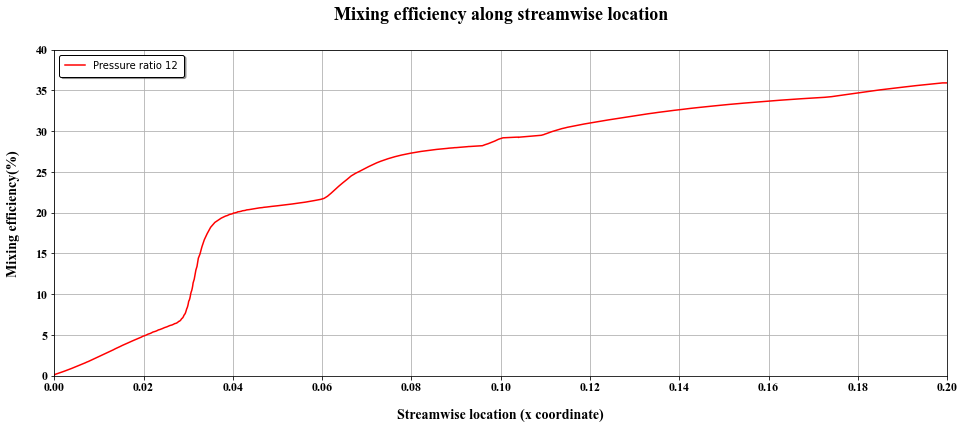

In [13]:
# Plotting the final graph

# Extracting the result_dataset
x_data = Result_dataset.loc[:,'x_coordinate']
y_data = Result_dataset.loc[:,"Mixing_efficiency(%)"]

# Specifying the fonts and fontproperties for title,labels and ticks
font = {'family': ['Times New Roman','sherif'],
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }
font_tick = {
    "family":"Times New Roman",
    "size":12,
    "weight":"heavy",
    "style":"normal"
}

# Plotting the result_data
plt.figure(figsize=(16,6))
plt.plot(x_data,y_data,"r")

# Manipulating the title, labels and legend
plt.title("Mixing efficiency along streamwise location",fontdict=font,size=18,fontweight='bold',pad=30)
plt.xlabel('Streamwise location (x coordinate)',fontdict=font,labelpad=15)
plt.ylabel('Mixing efficiency(%)',fontdict=font,labelpad=15)
plt.legend(["Pressure ratio 12"],loc="upper left",shadow=True,edgecolor='black',borderpad=0.6,prop={'weight':"normal"})

# Rearranging and specifying the ticks
plt.xticks(np.arange(0,0.200003,0.02),fontproperties=font_tick)
plt.yticks(fontproperties=font_tick)

# Specifying the limits and generating grids
plt.xlim(0,0.2)
plt.ylim(0,40)
plt.grid(True)

# Showing the plot
plt.show()


#### Key Takedowns:
* Mixing increases steadily with streamwise location(x_coordinate) across the whole ignitor with two significant jumps.
* These two significant jumps are observed at streamwise zones ```(Zone A: x = 0.30 ~ 0.40)``` and ```(Zone B: x = 0.60 ~ 0.75)```.

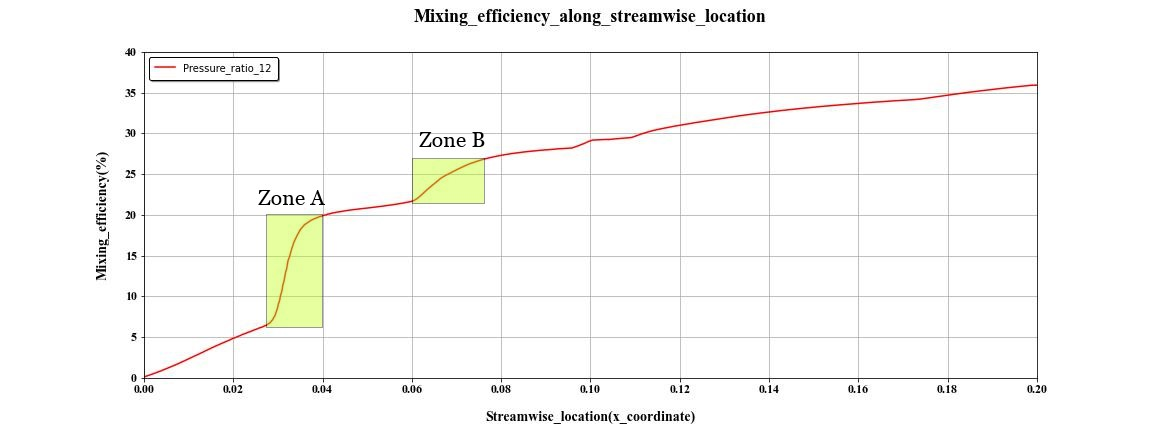

#### Recommendations:
- Please focus on ```Zone A``` and ```Zone B``` and try to find features using theoretical knowledge and literature review.

###  6. Act ( Implementation, Decision Making and Feedback on Model ):
In the final phase of the Data Analytics project, it's time for decision making. Stakeholder (Researcher team leader) acted on the key takedowns and recommendation made earlier on ```Zone A``` and ```Zone B```, and found some key insightful physics of the flow field in those specific regions.

## Resources:

To explore the notebook, **visit : [github](https://github.com/Mahbub1807/Personal-Project/blob/main/Mixing_Efficiency_Using_Python.ipynb)**

Export the datasets from the following cell. 

In [14]:
# Extract the output file

from IPython.display import display
import ipywidgets as widgets

def download_result(event):
    data.to_csv("C:/Users/mahbu/Downloads/Input_dataset.csv")
    print("\033[92m Input Dataset Downloaded Successfully!")
    Result_dataset.to_csv("C:/Users/mahbu/Downloads/Result_PR120.csv")
    print("\033[92m Mixing Efficiency Result Dataset Downloaded Successfully!")
    
csv_download_button = widgets.Button(description='Export Data',disabled=False,
                                     style=dict(button_color='#d7dadd',font_weight='bold'))
csv_download_button.on_click(download_result)
display(csv_download_button)

Button(description='Export Data', style=ButtonStyle(button_color='#d7dadd', font_weight='bold'))

 Input Dataset Downloaded Successfully!
 Mixing Efficiency Result Dataset Downloaded Successfully!


## Authors:

[<b>Md. Mahbub Talukder,](https://www.linkedin.com/in/mahbub-talukder-a853a5184/)<br>
BSc. in Mechanical Engineering,<br>
Bangladesh University of Engineering and Technology, Bangladesh.

[<b>Musarrat Bintay Hossain,](https://www.linkedin.com/in/musarrat-hossain-b97948176/)<br>
BSc. in Computer Science and Technology,<br>
Changsha University of Science and Technology, China. 
